In [31]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [32]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [33]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

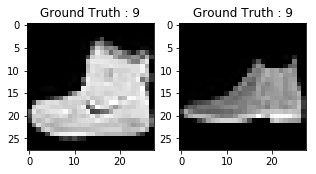

In [34]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [35]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [36]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [37]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [38]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [39]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [40]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

In [41]:
batch_size = 64
epochs = 13
num_classes = 10

In [42]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
#fashion_model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1),padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [43]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [44]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [45]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/13
48000/48000 [==============================] - 197s 4ms/step - loss: 0.4834 - acc: 0.8254 - val_loss: 0.3492 - val_acc: 0.8763
Epoch 2/13
48000/48000 [==============================] - 196s 4ms/step - loss: 0.2963 - acc: 0.8919 - val_loss: 0.2941 - val_acc: 0.8932
Epoch 3/13
48000/48000 [==============================] - 194s 4ms/step - loss: 0.2506 - acc: 0.9075 - val_loss: 0.2682 - val_acc: 0.9010
Epoch 4/13
48000/48000 [==============================] - 194s 4ms/step - loss: 0.2194 - acc: 0.9187 - val_loss: 0.2542 - val_acc: 0.9094
Epoch 5/13
48000/48000 [==============================] - 194s 4ms/step - loss: 0.1927 - acc: 0.9279 - val_loss: 0.2246 - val_acc: 0.9215
Epoch 6/13
48000/48000 [==============================] - 197s 4ms/step - loss: 0.1690 - acc: 0.9379 - val_loss: 0.2350 - val_acc: 0.9175
Epoch 7/13
48000/48000 [==============================] - 200s 4ms/step - loss: 0.1507 - acc: 0.9441 - val_loss: 0.2479 - 

In [46]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3065468075111508
Test accuracy: 0.9172


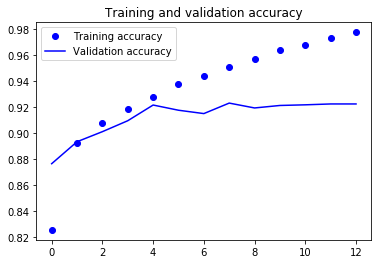

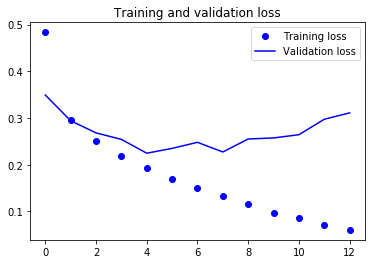

In [47]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
fashion_model.save("fashion_model_Nodropout.py")

In [49]:
batch_size = 64
epochs = 13
num_classes = 10

In [50]:
fashion_model2 = Sequential()
fashion_model2.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D((2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.4))
fashion_model2.add(Flatten())
fashion_model2.add(Dense(128, activation='linear'))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(Dropout(0.3))
fashion_model2.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
fashion_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [52]:
fashion_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [53]:
fashion_train_dropout = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/13
48000/48000 [==============================] - 239s 5ms/step - loss: 0.5581 - acc: 0.7990 - val_loss: 0.3717 - val_acc: 0.8693
Epoch 2/13
48000/48000 [==============================] - 251s 5ms/step - loss: 0.3854 - acc: 0.8610 - val_loss: 0.3260 - val_acc: 0.8824
Epoch 3/13
48000/48000 [==============================] - 242s 5ms/step - loss: 0.3476 - acc: 0.8756 - val_loss: 0.2955 - val_acc: 0.8938
Epoch 4/13
48000/48000 [==============================] - 236s 5ms/step - loss: 0.3256 - acc: 0.8821 - val_loss: 0.3056 - val_acc: 0.8889
Epoch 5/13
48000/48000 [==============================] - 237s 5ms/step - loss: 0.3110 - acc: 0.8874 - val_loss: 0.2914 - val_acc: 0.8979
Epoch 6/13
48000/48000 [==============================] - 246s 5ms/step - loss: 0.2970 - acc: 0.8936 - val_loss: 0.2800 - val_acc: 0.9012
Epoch 7/13
48000/48000 [==============================] - 241s 5ms/step - loss: 0.2909 - acc: 0.8968 - val_loss: 0.2793 - 

In [54]:
fashion_model2.save("fashion_model_dropout.py")

In [55]:
test_eval = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 16s 2ms/step
Test loss: 0.264746299803257
Test accuracy: 0.9058


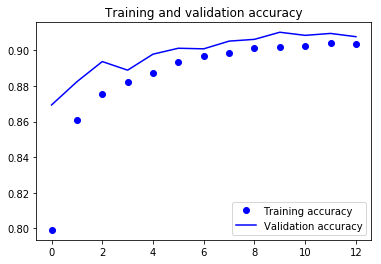

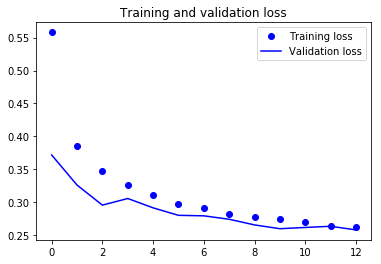

In [56]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
predicted_classes = fashion_model2.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 8966 correct labels


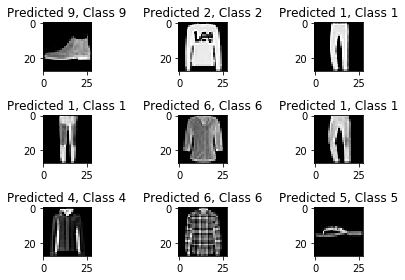

In [58]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [59]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print "Found %d incorrect labels" % len(incorrect)
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

SyntaxError: invalid syntax (<ipython-input-59-75192ace6fe7>, line 2)

In [60]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.69      0.91      0.79      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.85      0.84      0.85      1000
     Class 3       0.91      0.91      0.91      1000
     Class 4       0.91      0.73      0.81      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.70      0.73      1000
     Class 7       0.94      0.99      0.96      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.99      0.95      0.97      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

